# Assignment 2 DATA Analytics Laboratory

# Utkarsh PAthak  DA24S011

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import log
from sklearn import linear_model

#comment below if not using ipython notebook
%matplotlib inline

## Linear Model Fitting: y1 = mx

We are given a Spring dataset against time `x`, and we aim to fit a linear model `y2 = mx` that minimizes the Sum of Squared Errors (SSE). Note that there is no need for the intercept term (`c`), as the trend line (linear model) is observed to pass through the origin.

### Tasks

1. **OLS Closed Form Solution**:
   - Implement the Ordinary Least Squares (OLS) closed form solution using numpy’s matrix operators to find the value of `m` that minimizes SSE.

2. **Linear Search**:
   - Implement a linear search (the single-parameter search version of grid search) for `m = tan θ`, where θ ∈ [0°, 60°] in steps of 5°.
   - Measure the SSE at every choice of θ and create a plot that shows SSE vs θ.
   - Report the value of θ that minimizes SSE.

3. **Sklearn's LinearRegression**:
   - Implement the solution using sklearn’s `LinearRegression` class.

### let's load the data into a dataframe


In [68]:
data  = pd.read_csv('Assignment2.data', sep='\t')
data.head()

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47


In [69]:
data.describe()

,SpringPos,StockPrice
count,226.000000,226.000000
mean,3.785221,14.187743
std,10.704778,7.447450
min,-19.910000,0.670000
25%,-3.960000,8.355000
50%,4.195000,13.970000
75%,11.295000,19.632500
max,26.100000,30.050000


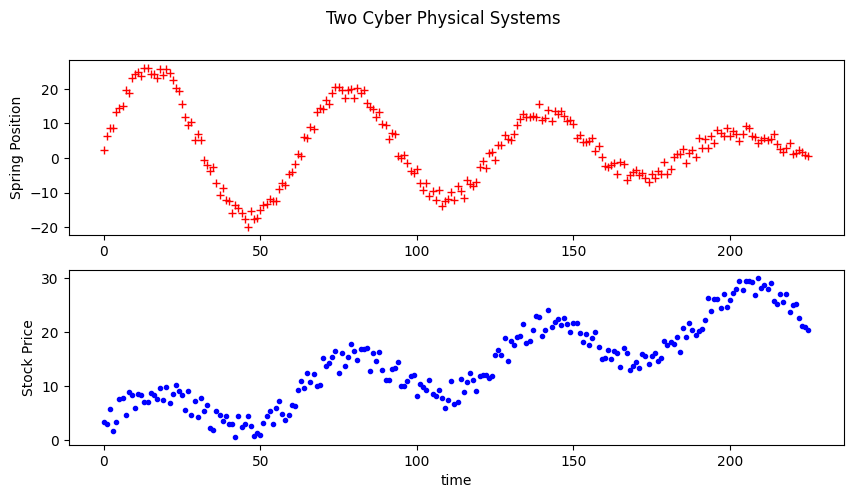

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Two Cyber Physical Systems')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(data.SpringPos, 'r+')
ax1.set_ylabel('Spring Position')
ax2.plot(data.StockPrice, 'b.')
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('time')

plt.show()

## Fit a linear model on the Spring dataset

---



In [71]:
y2 = pd.DataFrame({"x":range(226), "y":data.SpringPos})
y2.head()

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


### transform the data into matrices

In [72]:
yy = np.array(y2.y)
xx = np.expand_dims(y2.x, 1)

### run the closed form solution to estimate the beta parameter.

In [73]:
numerator = np.matmul(np.transpose(xx), yy)
denom = np.matmul(np.transpose(xx), xx)
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta[0])
sse = np.sum((xx*beta[0] - np.expand_dims(yy,1))**2)
print("SSE = ", sse)

Beta =  0.018321754998724564
SSE =  27738.298279267474


### as we will be reusing the above procedure often, let's make it a function

In [74]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

### Let's plot the raw data and the regression line on the same plot

Text(0.5, 0, 'Time')

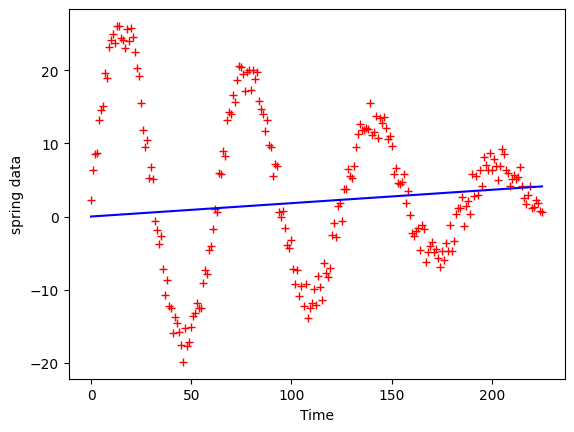

In [75]:
plt.plot(y2.x, y2.y, 'r+')
yhat1 = predict(beta, y2.x)
plt.plot(y2.x, yhat1, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('spring data')
plt.xlabel('Time')

### let's add an intercept (bias) to the data and check if the SSE drops further.

In [76]:
y2df = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.SpringPos})
yy = np.array(y2df.y)
xx = np.array(y2df[["bias","x"]])
y2df.head()

,bias,x,y
0,1.0,0,2.27
1,1.0,1,6.38
2,1.0,2,8.61
3,1.0,3,8.65
4,1.0,4,13.17


### estimate the beta params and compute the loss again

In [77]:
beta2 = estimateBeta(xx, yy)
print("beta =", beta2)
yhat2 = predict(beta2, xx)
loss = SSE(yy, yhat2)
print("SSE =", loss)

beta = [ 6.8505263  -0.02724716]
SSE = 25069.131971939343


### interesting! the loss has dropped with a little bit on intercept.  Let's plot it side by side.

Text(0.5, 0, 'Time')

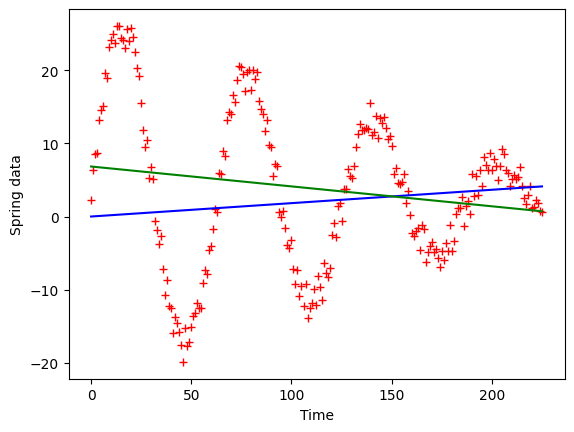

In [78]:
plt.plot(y2df.x, y2df.y, 'r+')
plt.plot(y2df.x, yhat1, 'b-')
plt.plot(y2df.x, yhat2, 'g-')
plt.ylabel('Spring data')
plt.xlabel('Time')

# LEt's bring together and plot the important graphs

OLS Estimated m: 0.018321754998724564
Grid Search (5-degree step) Estimated m: 0.0, Optimal Theta: 0 degrees
Sklearn LinearRegression Estimated m: 0.018321754998724564
Gradient Descent Estimated m: 0.01832175499872456


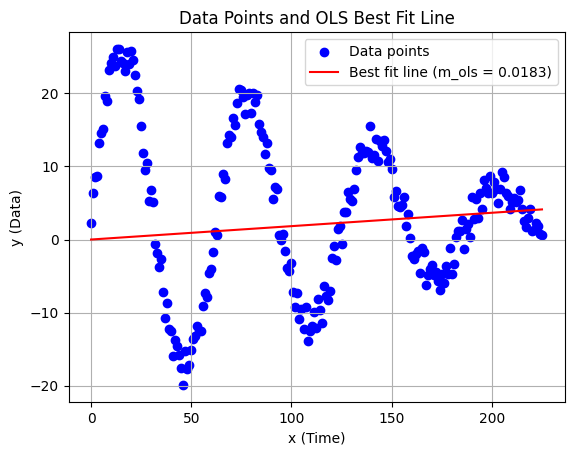

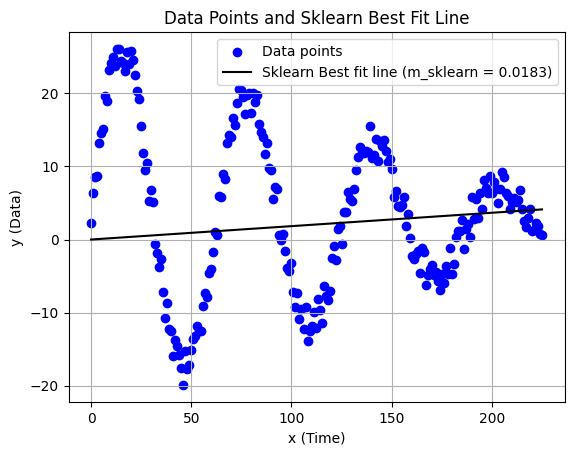

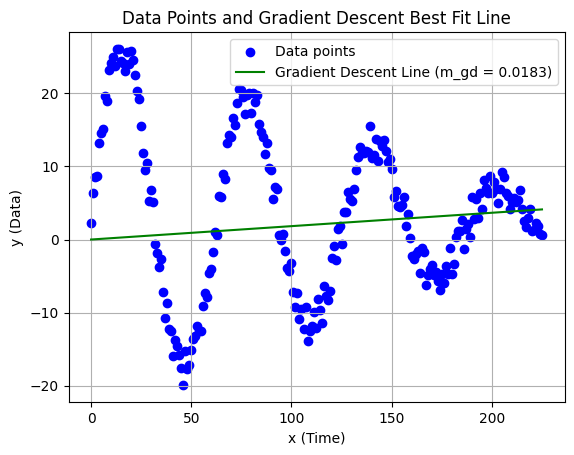

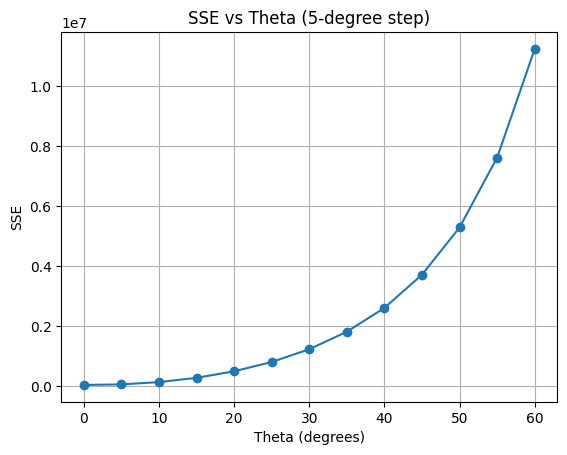

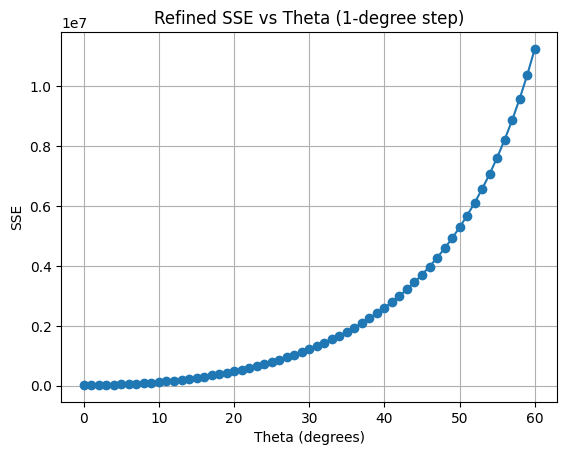

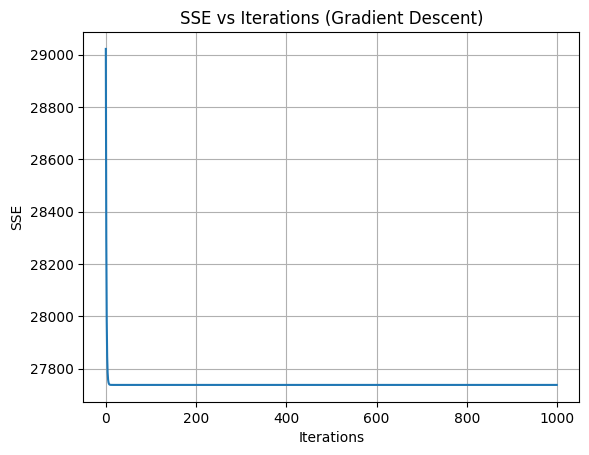

Refined Optimal Theta: 1 degrees, Refined Optimal m: 0.017455064928217585


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data_p = np.loadtxt("col1.data")


x = np.arange(len(data_p))  # Time intervals based on the number of data points
y = data_p  # the dataset

# OLS Closed-form solution: m = (x^T * y) / (x^T * x)
m_ols = np.dot(x, y) / np.dot(x, x)

# Grid Search for m = tan(theta), theta in [0, 60]
degrees = np.arange(0, 65, 5)
radians = np.radians(degrees)
m_values = np.tan(radians)

# Compute SSE for each m
sse_values = []
for m in m_values:
    y_pred = m * x  # Predicted y
    sse = np.sum((y - y_pred) ** 2)  # Compute SSE
    sse_values.append(sse)

# Find the theta that minimizes SSE
min_sse_idx = np.argmin(sse_values)
optimal_theta = degrees[min_sse_idx]
optimal_m = m_values[min_sse_idx]

# Sklearn's LinearRegression approach (forcing intercept = 0)
x_reshaped = x.reshape(-1, 1)
model = LinearRegression(fit_intercept=False)
model.fit(x_reshaped, y)
m_sklearn = model.coef_[0]

# Gradient Descent Implementation
alpha = 0.00001  # Learning rate
num_iterations = 1000  # Number of iterations
m_gd = 0  # Initial guess for m
n = len(x)

m_history = []
sse_history = []

for i in range(num_iterations):
    # Predicted y values based on current m
    y_pred = m_gd * x

    # Compute the gradient of SSE with respect to m
    gradient = -2 * np.sum(x * (y - y_pred)) / n

    # Update m using gradient descent update rule
    m_gd = m_gd - alpha * gradient

    # Store the SSE for this iteration
    sse = np.sum((y - y_pred) ** 2)
    sse_history.append(sse)
    m_history.append(m_gd)

print(f"OLS Estimated m: {m_ols}")
print(f"Grid Search (5-degree step) Estimated m: {optimal_m}, Optimal Theta: {optimal_theta} degrees")
print(f"Sklearn LinearRegression Estimated m: {m_sklearn}")
print(f"Gradient Descent Estimated m: {m_gd}")

# Refined Grid Search for m = tan(theta), theta in [0, 60] with 1-degree step
degrees_refined = np.arange(0, 61, 1)
radians_refined = np.radians(degrees_refined)
m_values_refined = np.tan(radians_refined)
sse_values_refined = []

for m in m_values_refined:
    y_pred = m * x
    sse = np.sum((y - y_pred) ** 2)  # Compute SSE
    sse_values_refined.append(sse)

# Find the theta that minimizes SSE in refined search
min_sse_idx_refined = np.argmin(sse_values_refined)
optimal_theta_refined = degrees_refined[min_sse_idx_refined]
optimal_m_refined = m_values_refined[min_sse_idx_refined]

# Plott

# Original Data and Best Fit Line for OLS
y_pred_ols = m_ols * x
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_ols, color='red', label=f'Best fit line (m_ols = {m_ols:.4f})')
plt.xlabel('x (Time)')
plt.ylabel('y (Data)')
plt.title('Data Points and OLS Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

# Sklearn Best Fit Line
y_pred_sklearn = m_sklearn * x
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_sklearn, color='black', label=f'Sklearn Best fit line (m_sklearn = {m_sklearn:.4f})')
plt.xlabel('x (Time)')
plt.ylabel('y (Data)')
plt.title('Data Points and Sklearn Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

# Gradient Descent Best Fit Line
y_pred_gd = m_gd * x
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred_gd, color='green', label=f'Gradient Descent Line (m_gd = {m_gd:.4f})')
plt.xlabel('x (Time)')
plt.ylabel('y (Data)')
plt.title('Data Points and Gradient Descent Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()

# SSE vs Theta (Grid Search with 5-degree step)
plt.plot(degrees, sse_values, marker='o')
plt.xlabel('Theta (degrees)')
plt.ylabel('SSE')
plt.title('SSE vs Theta (5-degree step)')
plt.grid(True)
plt.show()

# SSE vs Theta (Refined Grid Search with 1-degree step)
plt.plot(degrees_refined, sse_values_refined, marker='o')
plt.xlabel('Theta (degrees)')
plt.ylabel('SSE')
plt.title('Refined SSE vs Theta (1-degree step)')
plt.grid(True)
plt.show()

# SSE history of Gradient Descent
plt.plot(range(num_iterations), sse_history)
plt.xlabel('Iterations')
plt.ylabel('SSE')
plt.title('SSE vs Iterations (Gradient Descent)')
plt.grid(True)
plt.show()

# Final Output of Refined Optimal Theta and m
print(f"Refined Optimal Theta: {optimal_theta_refined} degrees, Refined Optimal m: {optimal_m_refined}")


# Compare the estimated ‘m’ values through the above three methods:


- **Precision and Implementation Differences**: The results are identical in out case. The OLS closed form, grid search, and scikit-learn all implement least squares, but slight differences may arise due to rounding errors, grid search step sizes, or different ways of minimizing the error.

- **Grid Search Resolution**: In grid search, the precision of \( m \) depends on the step size of \( \theta \). A finer step size may yield a closer match to the closed-form solution.

- **GD**: Gradient descent can slightly outperform OLS or grid search in terms of error minimization because it is an iterative, flexible, and often numerically more stable method, particularly when dealing with complex data or subtle numerical issues.



# ====================================================================================================================================

# Regression Model Tasks

## 1. Split the Data into Train, Eval & Test
- **Interpolation**: When we randomly split the data into train, eval, and test sets, the test and evaluation data points may lie within the data range (time range). If we predict those points correctly, wq are essentially recovering missing data along the regression line. This is referred to as the interpolation problem.

- **Extrapolation**: In this scenario, the test and evaluation points should be outside the time range of the training data. If our model is a good fit, predicting data points outside the range will extrapolate the regression line. This is also known as the “Forecasting” task.

## 2. Implement the Regression Model
- Use **OLS**, **LinearRegression**, or an equivalent method to implement the regression model. Apply appropriate **feature transformation** to lower the sum of squared errors (SSE) compared to Task 1.

## 3. Train the Regression Model for Interpolation
- Train the regression model with a split where test points lie inside the training data range (interpolation).
- Evaluate the **SSE** for interpolation.

## 4. Train the Regression Model for Extrapolation
- Train the regression model with a split where test points lie outside the training data range (extrapolation).
- Evaluate the **SSE** for extrapolation.


### Let's model the periodicity

Let's borrow the slope information from the fit to set up the scale of the time axis.

Instead of using $x$ in integer scale, we shall use the floating point scale as $x_1 \leftarrow \beta_0 * x$

Likewise, let's create a new data dimension to capture the periodicity as $x_2 \leftarrow sin(x_1)$

Based on the expanded feature space, now let's try to model $\hat{y} = m_1 x_1 + m_2 x_2$, note that we don't have to use the intercept $c$ as our previous linear model passed through the origin.


### create a feature space appropriately

In [80]:
x1 = round(y2.x*beta2[1],2)
x2 = np.sin(x1)

y21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.SpringPos})
y21.head(10)

,bias,x,x1,x2,y
0,1.0,0,-0.00,-0.000000,2.27
1,1.0,1,-0.03,-0.029996,6.38
2,1.0,2,-0.05,-0.049979,8.61
3,1.0,3,-0.08,-0.079915,8.65
4,1.0,4,-0.11,-0.109778,13.17
5,1.0,5,-0.14,-0.139543,14.52
6,1.0,6,-0.16,-0.159318,15.12
7,1.0,7,-0.19,-0.188859,19.62
8,1.0,8,-0.22,-0.218230,18.91
9,1.0,9,-0.25,-0.247404,23.17


### create the data matrices from the data frame

In [81]:
xx = np.array(y21[['bias', 'x1', 'x2']])
yy = np.array(y2.y)

In [82]:
beta3 = estimateBeta(xx, yy)
print("Beta = ", beta3)
yhat3 = predict(beta3, xx)
loss = SSE(yy, yhat3) #np.sum((np.matmul(xx,beta) - yy)**2)
print("SSE = ", sse)

Beta =  [11.99634589  2.6761454   5.21496085]
SSE =  11253105.782625107


### Let's plot the raw data and the regression line on the same plot

Text(0.5, 0, 'Time')

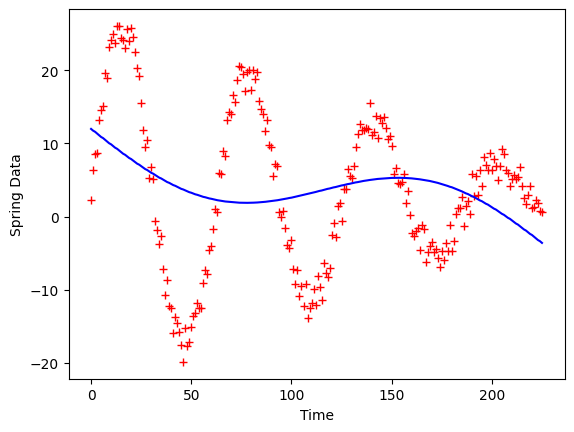

In [83]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat3, 'b-')
plt.ylabel('Spring Data')
plt.xlabel('Time')

### we were able to see the sin(x) from the visual.  what if we can't visualize? let's try the polynomial fit.

In [84]:
x1 = round(y2.x*beta2[1],2)

y21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "y":data.SpringPos})
y21.head(10)

,bias,x,x1,y
0,1.0,0,-0.00,2.27
1,1.0,1,-0.03,6.38
2,1.0,2,-0.05,8.61
3,1.0,3,-0.08,8.65
4,1.0,4,-0.11,13.17
5,1.0,5,-0.14,14.52
6,1.0,6,-0.16,15.12
7,1.0,7,-0.19,19.62
8,1.0,8,-0.22,18.91
9,1.0,9,-0.25,23.17


### create the data matrices from the data frame

In [85]:
# here we don't need the explicit bias feature column, as polynomial features would include it already (x^0 = 1)
xx = np.array(y21[['x1']])
yy = np.array(y2.y)

### let's use the polynomial features generator instead of manually doing it.

In [113]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 16)   # 16, 17
X_poly = poly_transformer.fit_transform(xx)

##  Degree 16 gives the correct fit to the model after a Linear search

### fit the model and estimate the loss

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)

#beta4 = estimateBeta(X_poly, yy)
#print("Beta = ", beta4)
#yhat4 = predict(beta4, X_poly)

loss = SSE(yy, yhat4)
print("SSE = ", loss)

Intercept= 2.5345165443987443 Beta =  [ 0.00000000e+00 -1.04239146e+02 -9.37348434e+01  3.20203487e+01
 -8.80678919e+01 -4.29351600e+01  1.56145296e+02  5.07605921e+01
 -1.69359525e+02 -1.98275913e+02 -1.06181859e+02 -3.41824266e+01
 -7.12533493e+00 -9.74139245e-01 -8.46890422e-02 -4.26004775e-03
 -9.46150733e-05]
SSE =  459.09705056395785


### Let's plot the raw data and the regression line on the same plot

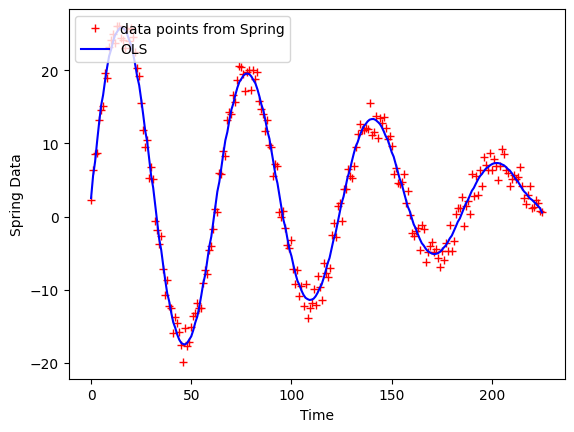

In [88]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat4, 'b-')
plt.ylabel('Spring Data')
plt.xlabel('Time')
plt.legend(['data points from Spring', 'OLS'], loc='upper left')
plt.show()

### Brilliant, how to I find the best degree automatically without performing a linear search!

In [89]:
from sklearn.linear_model import Lasso, Ridge
model5 = Lasso(alpha=500, max_iter=50000).fit(X_poly, yy)
#model5 = Ridge(alpha=5220).fit(X_poly,yy)
print("Beta =", model5.coef_)
yhat5 = model5.predict(X_poly)
loss = SSE(yy, yhat5)
print("SSE =", loss)

Beta = [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -6.20772761e-05  8.51954667e-06  1.91467709e-06 -3.23626926e-07
  3.70281039e-08 -2.44169353e-09 -2.27613850e-10  1.22899311e-10
 -2.87804959e-11]
SSE = 25157.729896630946


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+04, tolerance: 2.578e+00
  model = cd_fast.enet_coordinate_descent(


## Plot the Data, Poly Fir, Poly and Lasso fit, Line-Fit and Line+Sinusoid

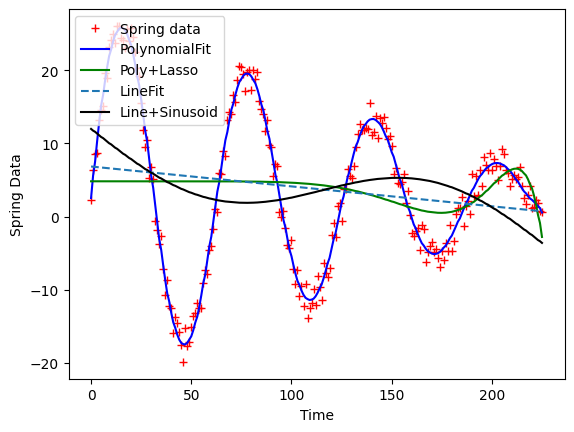

In [90]:
plt.ylabel('Spring Data')
plt.xlabel('Time')
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat4, 'b-')
plt.plot(y2.x, yhat5, 'g-')
plt.plot(y2.x, yhat2, '--')
plt.plot(y2.x, yhat3, 'k')
plt.legend(['Spring data', 'PolynomialFit', 'Poly+Lasso', 'LineFit', 'Line+Sinusoid'], loc='upper left')
plt.show()

### what if closed form is not possible?  Gradient descent comes to the rescue.

Let's consider solving the LineFit problem in the Gradient Descent style.

As long as our mathematical model of the system is differentiable (gradients are computable), our loss function $\mathcal{L} = (y-\hat{y})^2$ remains differentiable.

Our linear model is given by $\hat{y} = \beta_0 + \beta_1 x = X^\top\beta$ and the loss is given by $\mathcal{L} = [y - (\beta_0 + \beta_1 x)]^2 = [y-X^\top\beta]^\top[y-X^\top\beta]$

The average loss gradients for the full dataset are given by $\frac{\partial\mathcal{L}}{\partial\beta_0} = \frac{-2}{N} \sum (y-\hat{y}) $ and $\frac{\partial\mathcal{L}}{\partial\beta_1} = \frac{-2}{N} \sum X^\top(y-\hat{y})$

### the GD algorithm

* Choose the mathematical model; ensure it's continuous and differentiable.
* Initialize the model parameters to random numbers.  Usually they are sampled from standard normal distribution.
* Compute the gradient of the loss based on the current model parametric setting.
* Update the parameters using $\beta_i \leftarrow \beta_i + \eta \frac{\partial\mathcal{L}}{\partial\beta_i}$
* Repeat the last two steps until the loss minimizes to the required target or it reaches a plateau.  If the loss increases, you have done something incorrectly.

### let's implement the gradient descent algorithm for the linefit solution.

In [91]:
from tqdm.auto import tqdm

class MyLineFitViaGD:
    def __init__(self, learning_rate=0.0001, n_iters=10_000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # init parameters
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn(1)
        # gradient descent
        tq = tqdm(range(self.n_iters), desc="Iterations")
        for _ in  tq:
            # approximate y with linear combination of weights and x, plus bias
            y_predicted = np.matmul(X, self.weights) + self.bias

            # compute the gap between true and predicted outputs.
            diff = y_predicted - y
            loss = np.sum(diff * diff)

            # compute gradients
            dw = (1 / n_samples) * np.matmul(X.T, diff)
            db = (1 / n_samples) * np.sum(diff)
            # update parameters
            self.weights  = self.weights - self.lr * dw
            self.bias  = self.bias -  self.lr * db

            # display the loss on the progress bar.
            tq.set_postfix({"Loss":loss})

    @property
    def parameters(self):
        return self.bias, self.weights

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

### recall our linear fit dataset and construct the dataset matrices again

In [92]:
print(y2df.head())
yy = np.array(y2df.y)
xx = np.array(y2df[["x"]])  # no need for "bias", as our GD method factors it already.

   bias  x      y
0   1.0  0   2.27
1   1.0  1   6.38
2   1.0  2   8.61
3   1.0  3   8.65
4   1.0  4  13.17


### let's now build the model via Gradient Descent

In [93]:
gdmodel = MyLineFitViaGD(learning_rate=0.000001, n_iters=5000)

In [94]:
# fit the model and estimate the yhat values.
gdmodel.fit(xx, yy)

Iterations:   0%|          | 0/5000 [00:00<?, ?it/s]

In [95]:
#get the learned parameters from the model.
bias, weights = gdmodel.parameters
print("Bias =", bias, " Weights =", weights)

Bias = [-0.52119076]  Weights = [0.02178939]


In [96]:
# use the model to predict the yhat values.
yhat6 = gdmodel.predict(xx)

In [97]:
# estimate the loss again and display
loss = SSE(yy, yhat6)
print ("Loss =", loss)

Loss = 28159.890484875057


### let's visualize and compare the linear fits estimated by OLS and GD.

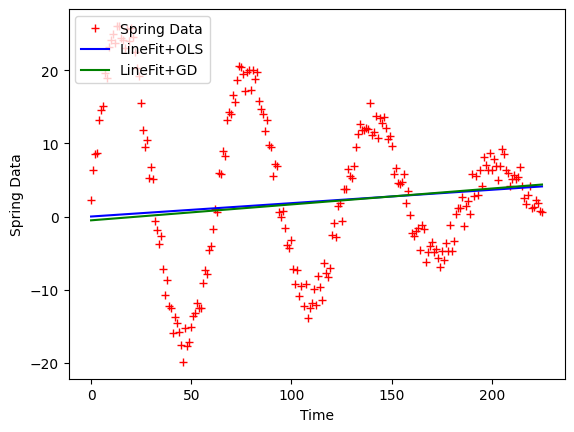

In [98]:
plt.plot(y2.x, y2.y, 'r+')
yhat1 = predict(beta, y2.x)
plt.plot(y2.x, yhat1, 'b-')
plt.plot(y2.x, yhat6, 'g-')
plt.ylabel('Spring Data')
plt.xlabel('Time')
plt.legend(['Spring Data', 'LineFit+OLS', 'LineFit+GD'], loc='upper left')
plt.show()

### let's try GD on our sinusoidal mathematical model

Now, our mathematical model of system is given by $\hat{y} = \beta_0 + \beta_1 x + \beta_2\cdot\sin(\beta_3 x)$

$\frac{\partial\mathcal{L}}{\partial\beta_0} = \frac{-2}{N} \sum (y-\hat{y})$

$\frac{\partial\mathcal{L}}{\partial\beta_1} = \frac{-2}{N} \sum X^\top(y-\hat{y})$

$\frac{\partial\mathcal{L}}{\partial\beta_2} = \frac{-2}{N} \sum \sin(\beta_3 X)^\top(y-\hat{y})$

$\frac{\partial\mathcal{L}}{\partial\beta_3} = \frac{-2}{N} \sum (\beta_2\cos(\beta_3 X) \cdot X)^\top(y-\hat{y})$

In [99]:
class MySinusoidFitViaGD:
    def __init__(self, learning_rate=0.0001, n_iters=10_000):
        self.lr = learning_rate
        self.n_iters = n_iters
        # init parameters
        self.m1 = np.abs(np.random.randn(1))
        self.m2 = np.abs(np.random.randn(1))
        # if I set this to random, convergence is not happening.  Choosing an initial value around 1.0 help convergence.
        self.m3 = [1] #np.abs(np.random.randn(1))
        self.bias = np.random.randn(1)
        print(f"Initial Params: Bias={self.bias[0]} M1={self.m1[0]}, M2={self.m2[0]}, M3={self.m3[0]}")

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # gradient descent
        tq = tqdm(range(self.n_iters), desc="Iterations")
        # placeholder to capture the loss trend.
        history = []

        for _ in  tq:
            # approximate y with linear combination of weights and x, plus bias
            y_predicted = self.predict(X)

            # compute the gap between true and predicted outputs.
            diff = y - y_predicted
            loss = SSE(y, y_predicted)

            # compute gradients
            dm1 = (-2 / n_samples) * np.matmul(X.T, diff)
            dm2 = (-2 / n_samples) * np.matmul(np.sin(self.m3*X).T, diff)
            dm3 = (-2 / n_samples) * np.matmul((X *self.m2* np.cos(self.m3*X)).T, diff)
            db  = (-2 / n_samples) * np.sum(diff)

            # update parameters
            self.m1  = self.m1 - self.lr * dm1
            self.m2  = self.m2 - self.lr * dm2
            self.m3  = self.m3 - self.lr * dm3
            self.bias= self.bias -  self.lr * db

            # display the loss on the progress bar.
            tq.set_postfix({"Loss":loss})

            record = self.parameters
            record.append(loss)
            history.append(record)

        #print(history)
        #return history
        return np.array(history)

    @property
    def parameters(self):
        return [self.bias[0], self.m1[0][0], self.m2[0][0], self.m3[0][0]]

    def predict(self, X):
        y_predicted = self.bias + self.m1*X + self.m2*np.sin(self.m3*X)
        return y_predicted

In [100]:
# here we don't need the explicit bias feature column
xx = np.array(y21[['x1']])
yy = np.expand_dims(y2.y, 1)
y21.head()

,bias,x,x1,y
0,1.0,0,-0.00,2.27
1,1.0,1,-0.03,6.38
2,1.0,2,-0.05,8.61
3,1.0,3,-0.08,8.65
4,1.0,4,-0.11,13.17


Initial Params: Bias=-0.9046856053195875 M1=0.8578652776463813, M2=1.486413233379558, M3=1


Iterations:   0%|          | 0/15000 [00:00<?, ?it/s]

Bias =  3.381287834383479  m1 = 0.13307609290079833  m2 = 0.34632715468101527  m3 = 1.7456943095902486
Loss = 25746.574041599117


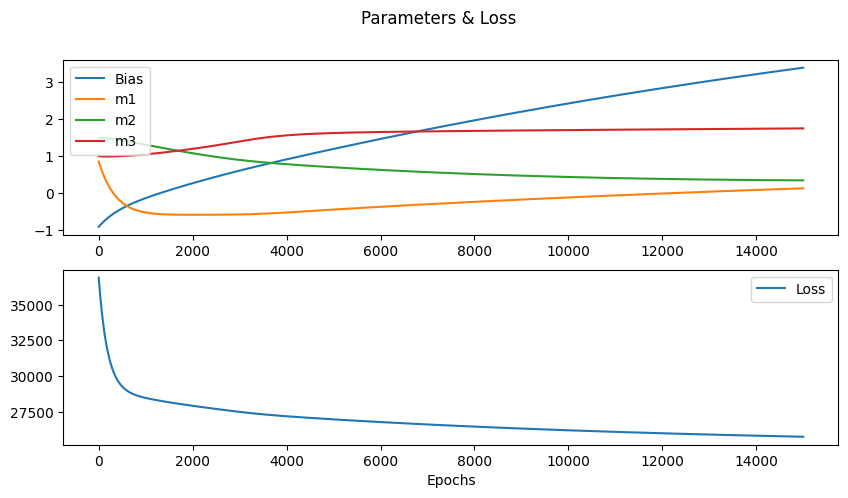

In [101]:
gdmodel = MySinusoidFitViaGD(learning_rate=0.0001, n_iters=15000)
# fit the model and estimate the yhat values.
history = gdmodel.fit(xx, yy)
#get the learned parameters from the model.
bias, w1, w2, w3 = gdmodel.parameters
print("Bias = ", bias, " m1 =", w1, " m2 =", w2, " m3 =", w3)
# use the model to predict the yhat values.
yhat7 = gdmodel.predict(xx)
# estimate the loss again and display
loss = SSE(yy, yhat7)
print ("Loss =", loss)

# let's plot the params and loss.
a1 = range(len(history))
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Parameters & Loss')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(a1, history[:,0])
ax1.plot(a1, history[:,1])
ax1.plot(a1, history[:,2])
ax1.plot(a1, history[:,3])
ax1.legend(['Bias', 'm1', 'm2', 'm3'], loc='upper left')

ax2.plot(a1, history[:,4])
ax2.set_xlabel('Epochs')
ax2.legend(['Loss'], loc='upper right')
plt.show()

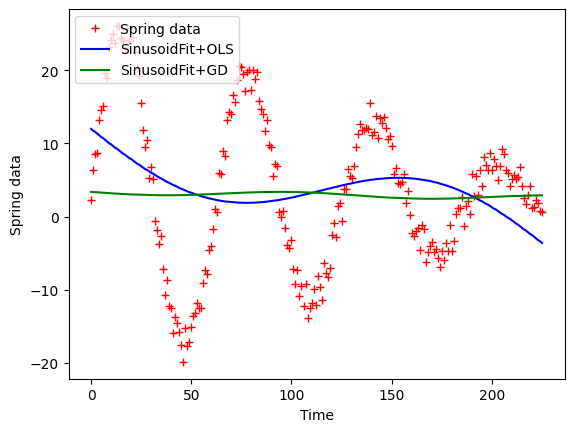

In [102]:
plt.plot(y2.x, y2.y, 'r+')
yhat1 = predict(beta, y2.x)
plt.plot(y2.x, yhat3, 'b-')
plt.plot(y2.x, yhat7, 'g-')
plt.ylabel('Spring data')
plt.xlabel('Time')
plt.legend(['Spring data', 'SinusoidFit+OLS', 'SinusoidFit+GD'], loc='upper left')
plt.show()

# Let's Train the model for Interpolation and extrapolation

Interpolation SSE (Evaluation Set): 4333.582616549734
Interpolation SSE (Test Set): 4981.568347662546
Extrapolation SSE: 4109.561796357026


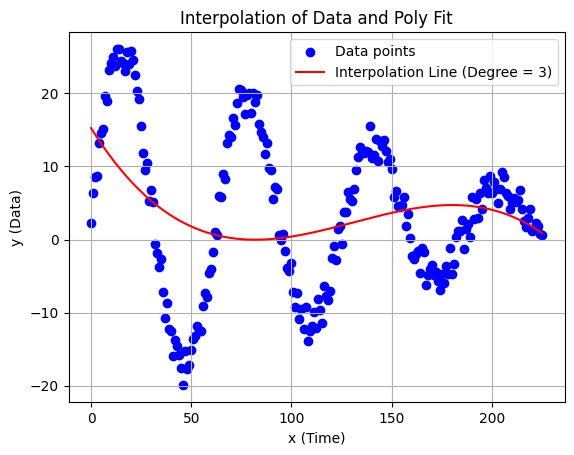

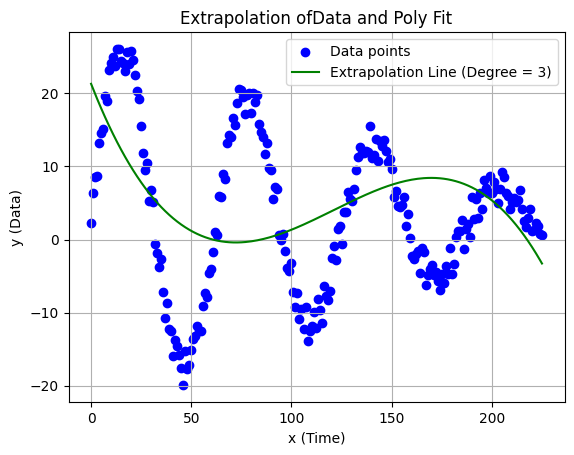

In [112]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = np.loadtxt("col1.data")
x = np.arange(len(data))
y = data

x_reshaped = x.reshape(-1, 1)

# Feature Transformation
degree = 3
poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x_reshaped)

# Interpolation Split
x_train, x_temp, y_train, y_temp = train_test_split(x_poly, y, test_size=0.4, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Train interpolation model
model_interp = LinearRegression(fit_intercept=False)
model_interp.fit(x_train, y_train)

# Predictionn on evaluation and test sets
y_pred_eval = model_interp.predict(x_eval)
y_pred_test = model_interp.predict(x_test)

# Compute SSE for interpolation
sse_eval = np.sum((y_eval - y_pred_eval) ** 2)
sse_test = np.sum((y_test - y_pred_test) ** 2)

# Extrapolation Split
split_idx = int(len(x_poly) * 0.7)
x_train_extrap = x_poly[:split_idx]
y_train_extrap = y[:split_idx]
x_test_extrap = x_poly[split_idx:]
y_test_extrap = y[split_idx:]

# Train extrapolation model
model_extrap = LinearRegression(fit_intercept=False)
model_extrap.fit(x_train_extrap, y_train_extrap)

# Predict on the test set (extrapolation)
y_pred_test_extrap = model_extrap.predict(x_test_extrap)

# Compute SSE for extrapolation
sse_extrapolation = np.sum((y_test_extrap - y_pred_test_extrap) ** 2)

print(f"Interpolation SSE (Evaluation Set): {sse_eval}")
print(f"Interpolation SSE (Test Set): {sse_test}")
print(f"Extrapolation SSE: {sse_extrapolation}")

# Plot for Interpolation
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model_interp.predict(x_poly), color='red', label=f'Interpolation Line (Degree = {degree})')
plt.xlabel('x (Time)')
plt.ylabel('y (Data)')
plt.title('Interpolation of Data and Poly Fit')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Extrapolation
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model_extrap.predict(x_poly), color='green', label=f'Extrapolation Line (Degree = {degree})')
plt.xlabel('x (Time)')
plt.ylabel('y (Data)')
plt.title('Extrapolation ofData and Poly Fit')
plt.legend()
plt.grid(True)
plt.show()


# References:

1. Numpy
2. Matplotlib
3. Github Solutions
4. GeeksForGeeks
5. Sklearn
6. stackoverflow